# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

19


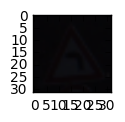

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
index = random.randint(0, n_train)
image = X_train[index].squeeze()
plt.figure(figsize=(1, 1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from skimage import color
from sklearn.preprocessing import scale

def PreProcess(X):
    #X = color.rgb2luv(X)
    #X = color.rgb2gray(X)
    X = X.astype('float32')
    X = X/255.0 - 0.5
    #X = np.reshape(X, (-1, 32, 32, 1))
    
    return X


X_train, y_train = shuffle(X_train, y_train, random_state = 42)
#X_train = PreProcess(X_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I tried a couple of approaches to Pre-Process the data, converting the image to gray scale, rgbtoluv and normalizing the pixel value between 0 to 1. With both the approaches it did not yield me good accuarcy. So I decided only to shuffle the data as part of pre-processing.

Normalization of pixel data is a type of pre-processing, this helps to converge to solution faster during gradient descent. Converting the image (pixel data) to gray scale reduces the amount of data to learn during training and hence improve speed of training, however converting to gray scale we eliminate some features (i.e color) and hence wherever color feature is important, we cannot use this.

Based on further reading as I understand for image classification, whitening and contrast normilzation are great techniques for preprocessing on images, since the human brain does this as part of its vision also. I did not try this in this project, but this are few techniques would consider during the next project for image classification


In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, 
                                                                test_size=0.2, 
                                                                stratify=y_train, 
                                                                random_state=42)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** I used the sklearn train_test_split to split the X_train into training and validation sets. I chose 20% of the original training data to be split into validation data.
The reason to generate and test on validation data is to make sure I am able to generazalize the model better and to make sure that test data does not influcence the training model

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):
    mu = 0
    sigma = 0.02
    
    # layer 1 - convolution, Input = 32x32x3, Output = 28x28x32
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_B = tf.Variable(tf.zeros(32))
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID'), conv1_B)
    
    # layer 1 - activation
    conv1 = tf.nn.relu(conv1)
    
    # layer 1 - max pooling, Input = 28x28x32, Output = 14x14x32
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # layer 2 - convolution, Input = 14x14x32, Output = 12x12x128
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 128), mean = mu, stddev = sigma))
    conv2_B = tf.Variable(tf.zeros(128))
    conv2 = tf.nn.bias_add(tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID'), conv2_B)
    
    # layer 2 - activation
    conv2 = tf.nn.relu(conv2)
    
    # layer 2 - max pooling, Input = 12x12x128, Output = 6x6x128
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # layer 3 - convolution, Input = 6x6x128, Output = 4x4x256
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 128, 256), mean = mu, stddev = sigma))
    conv3_B = tf.Variable(tf.zeros(256))
    conv3 = tf.nn.bias_add(tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID'), conv3_B)
    
    # layer 3 - activation
    conv3 = tf.nn.relu(conv3)
    
    # layer 3 - max pooling, Input = 4x4x256, Output = 2x2x256
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # flatten, Input = 2x2x256, Output = 1024
    fc = flatten(conv3)
    
    # layer 4 - fully connected 1, Input = 1024, Output = 256
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 256), mean = mu, stddev = sigma))
    fc1_B = tf.Variable(tf.zeros(256))
    fc1 = tf.matmul(fc, fc1_W) + fc1_B
    
    # layer 4 - activation
    fc1 = tf.nn.relu(fc1)
    
    # dropout - to avoid overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # layer 5 = fully connected 2, Input = 512, Ouptut = 128
    #fc2_W = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    #fc2_B = tf.Variable(tf.zeros(128))
    #fc2 = tf.matmul(fc1, fc2_W) + fc2_B
    
    # layer 5 - activation
    #fc2 = tf.nn.relu(fc2)
    
    # dropout - to avoid overfitting
    #fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # layer 5 = fully connected 2, Input = 256, Output = 43
    fc3_W = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma))
    fc3_B = tf.Variable(tf.zeros(43))
    #logits = tf.nn.softmax(tf.matmul(fc1, fc3_W) + fc3_B)
    logits = tf.matmul(fc1, fc3_W) + fc3_B
        
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The CNN model has 5 layers and is described as below:
Layer 1 (Input Layer):
Convolution, Input: 32x32x3, Output: 28x28x32, Filter: 5x5, Strides: 1x1x1x1, Padding: VALID
Relu activation
Max Pooling, Input: 28x28x32, Output: 14x14x32, Strides: 1x2x2x1, Padding: VALID 

Layer 2:
Convolution, Input: 14x14x32, Output: 12x12x128, Filter: 3x3, Strides: 1x1x1x1, Padding: VALID
Relu activation
Max Pooling, Input: 12x12x128, Output: 6x6x128, Strides: 1x2x2x1, Padding: VALID

Layer 3:
Convolution, Input: 6x6x128, Output: 4x4x256, Filter: 3x3, Strides: 1x1x1x1, Padding: VALID
Relu activation
Max Pooling, Input: 4x4x256, Output: 2x2x256, Strides: 1x2x2x1, Padding: VALID

Layer 4:
Fully Connected, Input: 1024, Output: 256
Relu activation
Dropout layer to avoid overfitting

Layer 5 (Output Layer):
Fully Connected, Input: 256, Output: 43



In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 9
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # Dropout probability
one_hot_y = tf.one_hot(y, 43)

In [8]:
rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training .....\n")
    for i in range(0, EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob: 0.4})
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {}...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'lenet')
    print("Model Saved\n")  

Training .....

EPOCH 1...
Validation Accuracy = 0.872

EPOCH 2...
Validation Accuracy = 0.973

EPOCH 3...
Validation Accuracy = 0.984

EPOCH 4...
Validation Accuracy = 0.986

EPOCH 5...
Validation Accuracy = 0.992

EPOCH 6...
Validation Accuracy = 0.980

EPOCH 7...
Validation Accuracy = 0.993

EPOCH 8...
Validation Accuracy = 0.993

EPOCH 9...
Validation Accuracy = 0.994

Model Saved



In [11]:
# test accuracy
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    #X_test = PreProcess(X_test)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.953


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
Optimizer: AdamOptimizer
Other options tried: ProximalGradientDescentOptimizer

Batch size: 128

Epochs: Since I did not normalize the pixel input, I want to keep the training weights down to avoid overfitting. So tried a few values to keep the value low and seems as to '11' worked better for me

Stddev: 0.02. Chosen this because of (1 / sqrt(32 * 32 *3))

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** 
From some of the reading, I understand optimial CNN layer arrangment are as like below:
INPUT -> [CONV -> RELU -> POOL] * K -> [FC -> RELU] * N -> FC
The values for K <=3, N <=3

In order to find more features at each layer of the CNN, I choose the depth to be slightly higher, since I did not use gray scale image for training, I used the original raw image for training, used deeper network for training.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

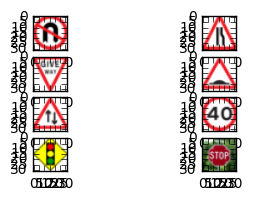

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import misc
images = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg']
img_arr = []

fig = plt.figure(figsize=(4, 2))
for i in range(0, len(images)):
    im = misc.imread(images[i])
    im = misc.imresize(im, (32, 32))
    #im = PreProcess(im)
    img_arr.append(im)
    a  = fig.add_subplot(4, 2, i+1)
    plt.imshow(im)
    
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** The model only trains for 43 different traffic signs, there are a lot more traffic signs and hence it might not be accurate.
Also, from a real scene, the traffic sign might be smaller than (32, 32) pixels, causing it hard to be determined correctly.

In [13]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    prediction = tf.argmax(logits, 1)
    print(prediction.eval(feed_dict = {x: img_arr, keep_prob: 1.0}, session = sess))

[29 18 13 22 30 40 14 14]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The predictions accuracy is:
1st Image: Actual: U-Turn Prohibited, Predicted: 29, Bicycles crossing (Incorrect)
2nd Image: Actual: Road Narrow ahead, Predicted: 18, General Caution (Incorrect)
3rd Image: Actual: Yield              Predicted: 13, Yield           (Correct)
4th Image: Actual: Bump               Predicted: 22, Bumpy Road      (Correct)
5th Image: Actual: Two way traffic,   Predicted: 30, Beware of Ice/Snow (Incorrect)
6th Image: Actual: 40 Speed limit,    Predicted: 40, Roundabout Mandatory (Incorrect)
7th Image: Actual: Traffic signals,   Predicted: 14, Stop (Incorrect)
8th Image: Actual: Stop,              Predicted: 14, Stop (Correct)

Accuracy: 37.5% (3/8)

The accuracy for the candidate image is 37.5% much lower than the testing accuracy of 95.3%. The model did not perform well on the real world images because of the below reasons:
1. It does not cover all the different traffic signs
2. Background image of traffic sign might be different in real world case.
3. The image might be rotated, reversed, tilted, jittered

In [14]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    print(sess.run(tf.nn.top_k(logits, 5), feed_dict = {x: img_arr, keep_prob: 1.0}))

TopKV2(values=array([[  2.38026214,  -3.53425646,  -3.57098675,  -3.77313566,
         -3.95983577],
       [ 37.18575668,  -0.24093376,  -0.98586231,  -1.40954721,
         -3.27715564],
       [ 47.28866577,  11.21395206,   6.66422129,   2.63153028,
         -8.72000313],
       [ 32.40159988,  28.16049957,  11.14468575,   4.44111919,
          3.75981379],
       [ 18.48534775,  10.74223042,   3.84639597,   2.95801091,
          2.49041915],
       [  2.82548285,  -1.80240154,  -2.01889658,  -9.04554367,
        -11.05942631],
       [ -0.31201658,  -1.57271922,  -1.58558333,  -1.61566806,
         -2.24443364],
       [ 21.35726357,   5.11121082,  -4.15799046,  -9.42550468,
        -10.38110828]], dtype=float32), indices=array([[29,  2, 25, 34, 20],
       [18, 24, 11, 26, 27],
       [13,  1,  4, 14,  2],
       [22, 29, 28, 24, 20],
       [30, 21, 24, 25, 31],
       [40, 18, 21, 12, 38],
       [14, 25, 38, 22, 26],
       [14, 17, 12,  1, 29]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** Some of the traffic signs are not part of the 43 sign's used for training and hence were wrong. 
On the 7th Image, where the actual signal is 'Traffic signals' & the predicted was 'Stop', in the top 5 values, I do see one of the index pointing to traffic signals and the values are close.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.